# <U>Synthetic Financial Fraud Detection Using Machine Learning</U>
## Step 1: Problem Definition

- Mobile money transactions allow people to send and receive money using their phones. This service is very popular, especially in countries where many people don’t have bank accounts.Unfortunately, some people try to cheat the system by making fake or unauthorized transactions to steal money. This is called **fraud**.
- Detecting fraud is very important because it helps protect people's money and keeps trust in the mobile money service.The problem is that fraud transactions are very rare compared to normal transactions. We want to build a computer program using **machine learning** that can look at details of each transaction, such as how much money was sent, what type of transaction it was, and when it happened, and then decide if the transaction is normal or fraudulent.

- For this we will use a dataset called **PaySim**, which is a made-up (synthetic) but realistic collection of mobile money transactions. It includes both normal and fraudulent transactions so the program can learn to tell the difference.
- Our goal is to create a system that helps mobile money companies quickly find and stop fraud before people lose money.This project will help make mobile money safer and more trustworthy for everyone who uses it.
- This project aims to develop a machine learning model that predicts fraudulent mobile money transactions based on various transaction details such as transaction type, amount, time step, and origin and destination account information. Utilizing the PaySim synthetic financial dataset from Kaggle(https://www.kaggle.com/datasets/ealaxi/paysim1), we will train, evaluate, and interpret models to help mobile money service providers detect and prevent fraud, thereby protecting customers and reducing financial losses.

### Why This Is Important:

- **Keeping Trust:** Finding fraud quickly helps people feel safe using mobile money.
- **Used by Many:** Many people use mobile money, especially where banks are hard tofind, so it needs to be safe.
- **Works Faster:** Computers can spot fraud faster and better than people.
- **Helps Business:** Good fraud detection saves money and keeps customers happy.
### Benefits of Fraud Detection
- Stops thieves from stealing money.
- Protects customers’ savings.
- Helps companies save a lot of money.
- Makes mobile money services safer to use.
- Builds trust between customers and companies.
### Main Goal of This Project
To develop a reliable computer program that can quickly and accurately detect and prevent dishonest or illegal money transactions.

### Adding Necessary Libraries For The Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay, classification_report, roc_curve,RocCurveDisplay,auc,roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings 
warnings.filterwarnings('ignore')

## Step 2: Data Understanding 

##### Loading and Analyzing the Data

### Understanding the Dataset Columns

| Column Name        | Description                                                      |
|--------------------|-----------------------------------------------------------------|
| **step**           | Each step is 1 hour(step=15 means the transaction happened in the 15th hour=3:00 PM)|
| **type**           | Type of transaction (e.g., PAYMENT, TRANSFER, CASH_OUT)         |
| **amount**         | Amount of money transferred                                     |
| **nameOrig**       | ID of the customer who initiated the transaction                 |
| **oldbalanceOrg**  | Sender’s balance before the transaction                          |
| **newbalanceOrig** | Sender’s balance after the transaction                           |
| **nameDest**       | ID of the recipient of the transaction                           |
| **oldbalanceDest** | Recipient’s balance before the transaction                       |
| **newbalanceDest** | Recipient’s balance after the transaction                        |
| **isFraud**        | Target variable: <br> 0 = Not Fraud (normal transaction) <br> 1 = Fraud (fake or illegal transaction) |
| **isFlaggedFraud** | System flag: <br> 0 = Not flagged (normal) <br> 1 = Flagged (transaction suspicious due to very large amount) |


In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


##### <U> Dataset Shape </U>

To check the number of rows and columns in the dataset, use the `.shape` property:

In [3]:
df.shape

(6362620, 11)

##### <u> Checking for Missing Values  </u>

In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

##### <u> Checking for Duplicate Values  </u>

In [5]:
df.duplicated().sum()

np.int64(0)

#####  Dataset Summary:

Use the following command to generate a statistical summary of all **numerical features**:

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


##### Quick Data Overview:

Use the following command  to see a quick summary of your dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


##### <U> Dataset Features </U>
The dataset includes numeric and categorical features to predict liver disease.

In [8]:
# Continuous (numeric) features
continuous_features = ['step', 'amount']
# Categorical features to encode
categorical_features = ['type', 'nameOrig', 'nameDest', 'isFlaggedFraud']
# Target variable
target = 'isFraud'

#### Important Note
When a transaction is found to be fraud, it gets stopped (cancelled). Because it is stopped, the money amounts before and after the transaction might not be updated properly in the data.
This means the balance columns:
- `oldbalanceOrg`  
- `newbalanceOrig`  
- `oldbalanceDest`  
- `newbalanceDest`  
may have wrong or confusing numbers.
So, to avoid mistakes, we should **not use these balance columns** when training or testing the fraud detection model.

***Use balance columns during EDA to explore patterns and understand the data.***
***Avoid using them as input features for your machine learning models to keep predictions accurate.***

In [9]:
df[categorical_features].nunique()

type                    5
nameOrig          6353307
nameDest          2722362
isFlaggedFraud          2
dtype: int64

## Step 3: Exploratory Data Analysis (EDA)

### Fraud vs Non-Fraud Transactions

This chart shows how many transactions are **fraudulent** and how many are **not**.
- Most transactions are **not fraud** (`isFraud = 0`), meaning the dataset is **imbalanced**.
- This imbalance can affect model performance, so we may use techniques like **Ramdom Sampling or Smote** later to handle it.

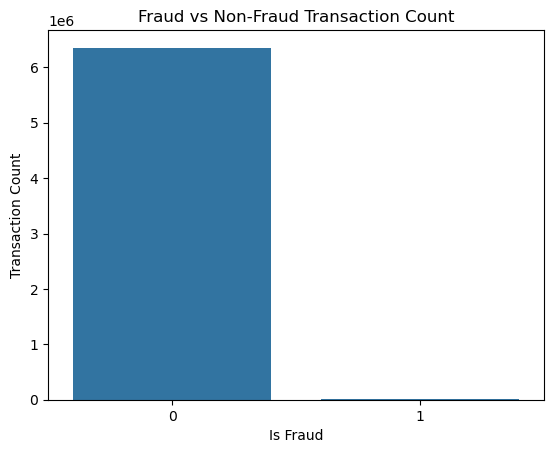

In [10]:
sns.countplot(x='isFraud', data=df)
plt.title('Fraud vs Non-Fraud Transaction Count')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Count')
plt.show()

In [11]:
# Count of fraud vs non-fraud transactions
fraud_counts = df['isFraud'].value_counts()
print("Transaction Counts:")
print(f"Not Fraudulent (0): {fraud_counts[0]}")
print(f"Fraudulent (1): {fraud_counts[1]}")

Transaction Counts:
Not Fraudulent (0): 6354407
Fraudulent (1): 8213


### Transaction Type Distribution

- This chart shows how many transactions belong to each type, such as PAYMENT, TRANSFER, CASH_OUT, etc.
- It helps us see which transaction types are most common.
- Understanding this helps to find patterns and focus on types where fraud may happen more.

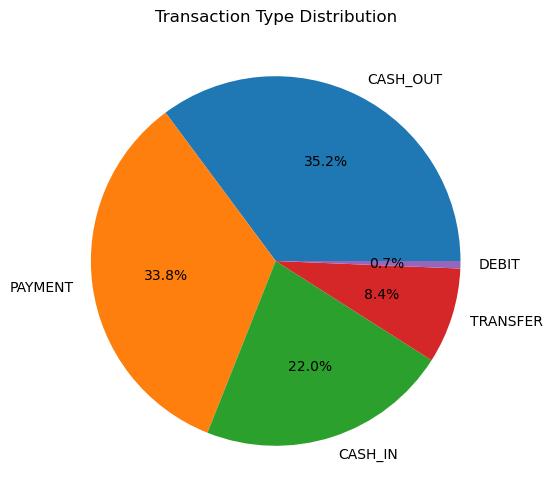

In [12]:
df['type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title('Transaction Type Distribution')
plt.ylabel('')
plt.show()

### Understanding the `amount` Column
- The `amount` column shows how much money was sent in each transaction.
- Some transactions are small, and some are very big.
- To understand the data better, we can group the amounts into different size ranges like:
  - **0 to 1,000**
  - **1,000 to 5,000**
  - **5,000 to 10,000**
  - **More than 10,000**

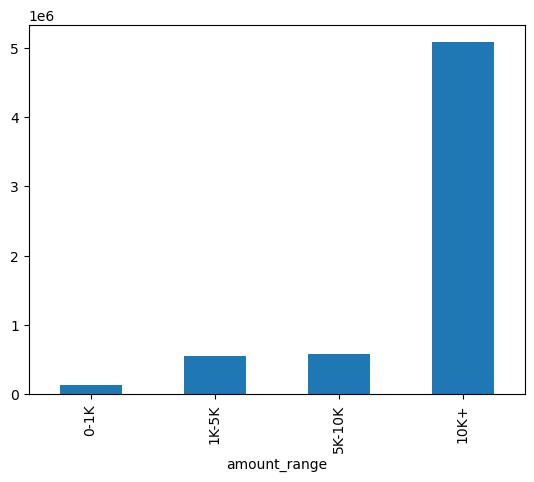

In [13]:
bins = [0, 1000, 5000, 10000, df['amount'].max()]
labels = ['0-1K', '1K-5K', '5K-10K', '10K+']
df['amount_range'] = pd.cut(df['amount'], bins=bins, labels=labels)
df['amount_range'].value_counts().sort_index().plot(kind='bar')
plt.show()

### How Much Money Was Sent by the Sender
- We check how much money the sender had before and after the transaction.  
- By subtracting the new balance from the old balance, we find out how much money was sent.  
- Below are the first 5 amounts sent in the dataset.

In [14]:
df['balance_change'] = df['oldbalanceOrg'] - df['newbalanceOrig']
print(df['balance_change'].head())

0     9839.64
1     1864.28
2      181.00
3      181.00
4    11668.14
Name: balance_change, dtype: float64


### How Much Money Was Received by the Recipient
- We look at the recipient’s balance before and after the transaction.  
- By subtracting the old balance from the new balance, we find out how much money was received.  
- Below are the first 5 amounts received by the recipients.

In [15]:
# Calculate how much money the recipient received in the transaction
df['recipient_balance_change'] = df['newbalanceDest'] - df['oldbalanceDest']
print(df['recipient_balance_change'].head())

0        0.0
1        0.0
2        0.0
3   -21182.0
4        0.0
Name: recipient_balance_change, dtype: float64


##### <U>Correlation Analysis</U>

Correlation heatmap for continuous variables.
Check if any features are highly correlated (multicollinearity).

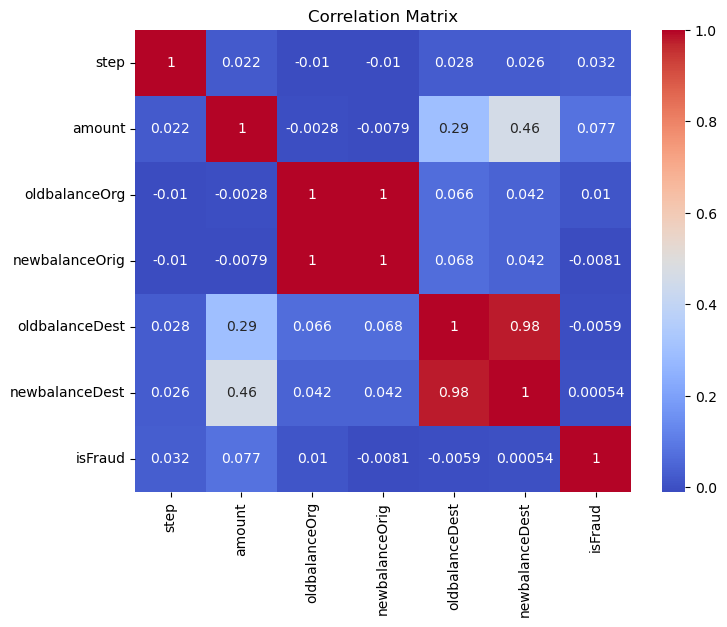

In [16]:
numeric_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Step 4 : Data Wrangling

#### <U>(4a)Checking For Skewness</U>
      Skewness shows whether the data is symmetrical, left-skewed, or right-skewed.
      Conditions for Skewness

| Skewness Value   | Interpretation                     |
|------------------|-------------------------------------|
| 0                | Perfectly symmetrical               |
| > 0              | Right-skewed (tail on the right)    |
| < 0              | Left-skewed (tail on the left)      |
| -0.5 to +0.5     | Fairly symmetrical                  |
| -1 to -0.5       | Moderate left skew                  |
| +0.5 to +1       | Moderate right skew                 |
| < -1 or > +1     | Highly skewed (needs transformation) |


Apply the skewness for only necessary continous variables only 

In [17]:
numeric_cols = ['step', 'amount'] 
for col in numeric_cols:
    skewness = df[col].skew()
    print(f"Skewness of {col}: {skewness}")

Skewness of step: 0.37517688846984765
Skewness of amount: 30.99394948249038


In [18]:
df['amount_log'] = np.log1p(df['amount']) 
df['amount_log']

0           9.194276
1           7.531166
2           5.204007
3           5.204007
4           9.364703
             ...    
6362615    12.735768
6362616    15.657870
6362617    15.657870
6362618    13.652996
6362619    13.652996
Name: amount_log, Length: 6362620, dtype: float64

#### <U>(4b)Encoding</U> 

### 🧠 Why We Use One-Hot Encoding

- Machine learning models **only work with numbers**, not text.
- The `type` column (like `PAYMENT`, `TRANSFER`, `CASH_OUT`) is **categorical** (text data).
- We use **One-Hot Encoding** to turn each category into a separate column with 0 or 1.

In [19]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [20]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,amount_range,balance_change,recipient_balance_change,amount_log,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,5K-10K,9839.64,0.0,9.194276,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1K-5K,1864.28,0.0,7.531166,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0-1K,181.00,0.0,5.204007,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0-1K,181.00,-21182.0,5.204007,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,10K+,11668.14,0.0,9.364703,False,False,True,False


#### <U>(4C).Scaling</U>

- Scaling means changing big numbers into smaller ones so that all the features in the data are on a similar scale.  
- This is important because machines sometimes treat bigger numbers as more important.  
- If one feature has large values and another has small values, the model might focus more on the big ones.  
- To avoid this, we scale the data so that all features are treated equally.  
- Scaling should only be used on continuous data (like age, bmi,AlcoholConsumption and so on.)not on data with fixed categories or small whole numbers.
- If we apply scaling before splliting it will cause data leakage so apply during train test split 

### Before Going to modelling lets drop unusable columns

“Transactions which are detected as fraud are cancelled, so for fraud detection these columns must not be used”

In [21]:
df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'balance_change', 'recipient_balance_change'], axis=1, inplace=True)

Drop Unusable Columns
e.g.nameOrig, nameDest

In [22]:
df.drop(['nameOrig', 'nameDest','amount_range','amount'], axis=1, inplace=True)

### Step 5: Modelling

In [23]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']
# Convert boolean one-hot encoded columns to integers
bool_cols = ['type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
X[bool_cols] = X[bool_cols].astype(int)       #step forgotten during preprocessing

In [24]:
X

,step,isFlaggedFraud,amount_log,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,0,9.194276,0,0,1,0
1,1,0,7.531166,0,0,1,0
2,1,0,5.204007,0,0,0,1
3,1,0,5.204007,1,0,0,0
4,1,0,9.364703,0,0,1,0
...,...,...,...,...,...,...,...
6362615,743,0,12.735768,1,0,0,0
6362616,743,0,15.657870,0,0,0,1
6362617,743,0,15.657870,1,0,0,0
6362618,743,0,13.652996,0,0,0,1


In [25]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

We are splitting the dataset into:

- **80% training data**
- **20% testing data**

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
# List of columns to scale
columns_to_scale =  ['step', 'amount_log']

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a copy so original data is safe
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
# Initialize the scaler

scaler = StandardScaler()   # important for joblib (varname)
# Fit on training data and transform both train and test
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [28]:
from imblearn.under_sampling import RandomUnderSampler
# Apply Random Undersampling on scaled training data only
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_scaled, y_train)
# Check class distribution after resampling
from collections import Counter
print(Counter(y_train_resampled))

Counter({0: 6593, 1: 6593})


In [29]:
#------Creating a DataFrame that stores all the metrics and performance of each model which will help in Model Selection----------------
algorithms = ['logistic_Model', 'knn_Model', 'svm_Model', 'dt_Model', 'rf_Model', 'ada_Model', 'gb_Model', 'xg_Model']
metrics = ['TrainAccuracy', 'TestAccuracy', 'TrainPrecision', 'TestPrecision','TrainRecall', 'TestRecall',
          'TrainF1', 'TestF1', 'CV']

analysis_df = pd.DataFrame(index=algorithms, columns=metrics)

In [30]:
#-----DataFrame to store metrics useful for further analysis and Model Selection-------------------------
analysis_df

,TrainAccuracy,TestAccuracy,TrainPrecision,TestPrecision,TrainRecall,TestRecall,TrainF1,TestF1,CV
logistic_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
knn_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
svm_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dt_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rf_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ada_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gb_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xg_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#---Function that calculates all the metrics and Classification report and updatas values in the analysis_df DataFrame--------------------
def model_performance(model_key, model_obj, X_train, y_train, X_test, y_test, analysis_df):
    y_train_pred = model_obj.predict(X_train)
    y_test_pred = model_obj.predict(X_test)

    
    analysis_df.loc[model_key, 'TrainAccuracy'] = accuracy_score(y_train, y_train_pred)
    analysis_df.loc[model_key, 'TestAccuracy'] = accuracy_score(y_test, y_test_pred)
    analysis_df.loc[model_key, 'TrainPrecision'] = precision_score(y_train, y_train_pred)
    analysis_df.loc[model_key, 'TestPrecision'] = precision_score(y_test, y_test_pred)
    analysis_df.loc[model_key, 'TrainRecall'] = recall_score(y_train, y_train_pred)
    analysis_df.loc[model_key, 'TestRecall'] = recall_score(y_test, y_test_pred)
    analysis_df.loc[model_key, 'TrainF1'] = f1_score(y_train, y_train_pred)
    analysis_df.loc[model_key, 'TestF1'] = f1_score(y_test, y_test_pred)

    cv_score = cross_val_score(model_obj, X_train, y_train, cv=5, scoring='accuracy').mean()
    analysis_df.loc[model_key, 'CV'] = cv_score

    print(f'📘 Classification Report — {model_key} (Train)')
    print(classification_report(y_train, y_train_pred))
    print(f'📘 Classification Report — {model_key} (Test)')
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix - Train
    cm_train = confusion_matrix(y_train, y_train_pred)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
    disp_train.plot(cmap='Reds')
    plt.title(f'{model_key} — Confusion Matrix (Train)')
    plt.show()

    # Confusion Matrix - Test
    cm_test = confusion_matrix(y_test, y_test_pred)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
    disp_test.plot(cmap='Greens')
    plt.title(f'{model_key} — Confusion Matrix (Test)')
    plt.show()
    

    return analysis_df

# LOGISTIC REGRESSION 

#### <U> Modelling</U>
Logistic Regression(Base Line Model)>>>>>>>>>>>>>>>>>> 1st model

In [32]:
from sklearn.linear_model import LogisticRegression
Lr= LogisticRegression()
Lr.fit(X_train_resampled,y_train_resampled)

LogisticRegression()

In [33]:
Lr.coef_

array([[ 0.46494321,  0.33076307,  0.50153126,  5.06055785, -0.12312363,
        -1.61008624,  6.38207721]])

In [34]:
Lr.intercept_

array([-5.29130983])

In [35]:
s1=pd.DataFrame(Lr.predict_proba(X_train_resampled))
s1.drop(columns=[0],inplace=True)
s1

,1
0,0.000329
1,0.000901
2,0.005139
3,0.000641
4,0.292353
...,...
13181,0.927380
13182,0.513580
13183,0.907109
13184,0.929989


In [36]:
Lr.predict(X_train_resampled)

array([0, 0, 0, ..., 1, 1, 1])

In [37]:
Lr.predict_proba(X_train_resampled)

array([[9.99671447e-01, 3.28553488e-04],
       [9.99098576e-01, 9.01423728e-04],
       [9.94861143e-01, 5.13885729e-03],
       ...,
       [9.28911392e-02, 9.07108861e-01],
       [7.00114184e-02, 9.29988582e-01],
       [2.50971173e-01, 7.49028827e-01]])

#### ***Evaluation***

In [38]:
ypred_train = Lr.predict((X_train_resampled))
print("TRAIN ACCURACY ",accuracy_score(y_train_resampled,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(Lr,X_train_resampled,y_train_resampled,cv=5,scoring="accuracy").mean())
ypred_test= Lr.predict(X_test_scaled)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))

TRAIN ACCURACY  0.813893523433945
THE CV SCORE(accuracy  of model) 0.8133627048220016
TEST ACCURACY  0.7397895835363419


📘 Classification Report — logistic_Model (Train)
              precision    recall  f1-score   support

           0       0.87      0.74      0.80      6593
           1       0.77      0.89      0.83      6593

    accuracy                           0.81     13186
   macro avg       0.82      0.81      0.81     13186
weighted avg       0.82      0.81      0.81     13186

📘 Classification Report — logistic_Model (Test)
              precision    recall  f1-score   support

           0       1.00      0.74      0.85   1270904
           1       0.00      0.88      0.01      1620

    accuracy                           0.74   1272524
   macro avg       0.50      0.81      0.43   1272524
weighted avg       1.00      0.74      0.85   1272524



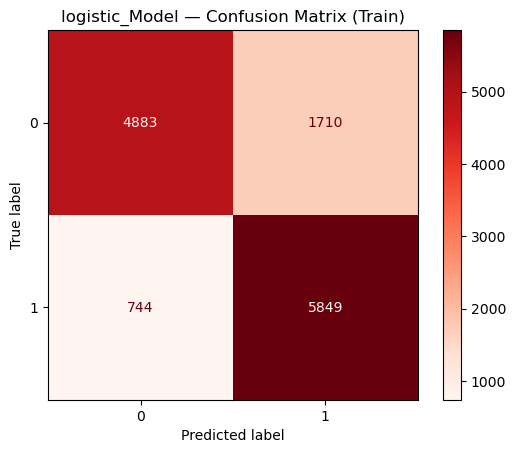

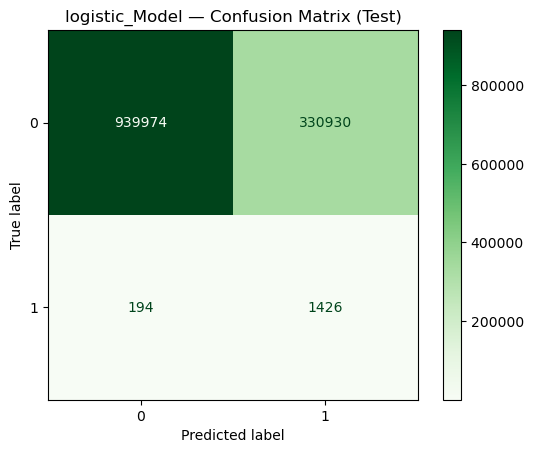

In [39]:
logistic_Model_Report = model_performance('logistic_Model', Lr, X_train_resampled, y_train_resampled, X_test_scaled, y_test, analysis_df)

# KNN CLASSIFIER 

#### <U> Modelling</U>

In [40]:
from sklearn.neighbors import KNeighborsClassifier
estimator= KNeighborsClassifier()
param_grid={"n_neighbors": list(range(1,50))}
from sklearn.model_selection import GridSearchCV
cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
cv_classifier.fit(X_train_resampled,y_train_resampled)
cv_classifier.best_params_

{'n_neighbors': 35}

#### ***Evaluation***

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train_resampled,y_train_resampled)
ypred_train = knn.predict(X_train_resampled)
print("TRAIN ACCURACY ",accuracy_score(y_train_resampled,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(knn,X_train_resampled,y_train_resampled,cv=5,scoring="accuracy").mean())
ypred_test= knn.predict(X_test_scaled)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))

TRAIN ACCURACY  0.8791142120430759
THE CV SCORE(accuracy  of model) 0.8759290070188543
TEST ACCURACY  0.8775087935473123


📘 Classification Report — knn_Model (Train)
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6593
           1       0.88      0.88      0.88      6593

    accuracy                           0.88     13186
   macro avg       0.88      0.88      0.88     13186
weighted avg       0.88      0.88      0.88     13186

📘 Classification Report — knn_Model (Test)
              precision    recall  f1-score   support

           0       1.00      0.88      0.93   1270904
           1       0.01      0.88      0.02      1620

    accuracy                           0.88   1272524
   macro avg       0.50      0.88      0.48   1272524
weighted avg       1.00      0.88      0.93   1272524



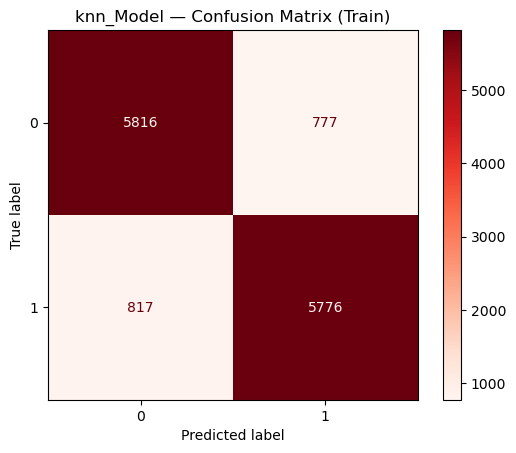

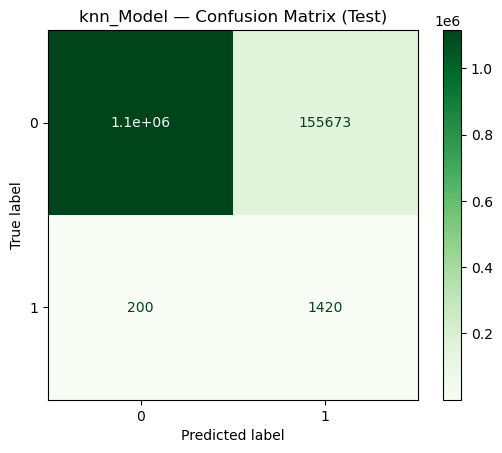

In [42]:
knn_Model_Report = model_performance('knn_Model', knn, X_train_resampled, y_train_resampled, X_test_scaled, y_test, analysis_df)

# SUPPORT VECTOR MACHINE 

#### <U> Modelling</U>

#####  FIRST TRY WITHDEFAULT PARAMS 

In [43]:
from sklearn.svm import SVC
svm = SVC(C=1,kernel="rbf")
svm.fit(X_train_resampled, y_train_resampled)
ypred_train = svm.predict(X_train_resampled)
print("TRAIN ACCURACY ",accuracy_score(y_train_resampled,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(svm,X_train_resampled,y_train_resampled,cv=5,scoring="accuracy").mean())
ypred_test= svm.predict(X_test_scaled)
print("TEST ACCURACY",accuracy_score(y_test,ypred_test))    # Default value of c is 1 and kernel is rbf

TRAIN ACCURACY  0.8692552707416957
THE CV SCORE(accuracy  of model) 0.8678141270075381
TEST ACCURACY 0.8804038273541402


#### Hyperparameter Tuning For Svm Classifier

In [44]:
from sklearn.model_selection import GridSearchCV
estimator= SVC()
param_grid={"C":  [0,0.1, 1],"kernel":["linear","rbf","sigmoid","poly"]}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train_resampled,y_train_resampled)
grid.best_params_                                                     # Default value of c is 1 and kernel is rbf

{'C': 1, 'kernel': 'rbf'}

In [45]:
### Apply The SVM WITH BEST PARAMETERS

In [46]:
svm = SVC(C=1,kernel="rbf")
svm.fit(X_train_resampled, y_train_resampled)
ypred_train = svm.predict(X_train_resampled)
print("TRAIN ACCURACY ",accuracy_score(y_train_resampled,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(svm,X_train_resampled,y_train_resampled,cv=5,scoring="accuracy").mean())
ypred_test= svm.predict(X_test_scaled)
print("TEST ACCURACY",accuracy_score(y_test,ypred_test))

TRAIN ACCURACY  0.8692552707416957
THE CV SCORE(accuracy  of model) 0.8678141270075381
TEST ACCURACY 0.8804038273541402


📘 Classification Report — svm_Model (Train)
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      6593
           1       0.88      0.86      0.87      6593

    accuracy                           0.87     13186
   macro avg       0.87      0.87      0.87     13186
weighted avg       0.87      0.87      0.87     13186

📘 Classification Report — svm_Model (Test)
              precision    recall  f1-score   support

           0       1.00      0.88      0.94   1270904
           1       0.01      0.86      0.02      1620

    accuracy                           0.88   1272524
   macro avg       0.50      0.87      0.48   1272524
weighted avg       1.00      0.88      0.94   1272524



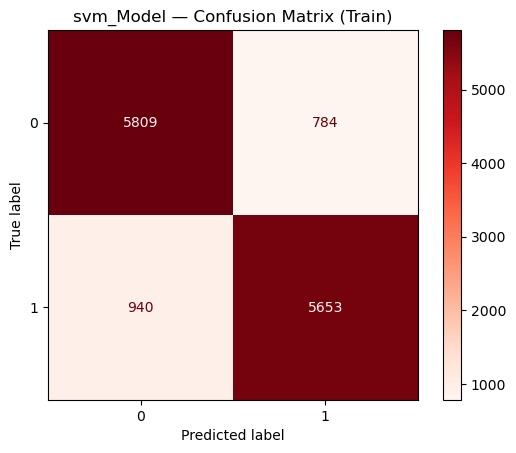

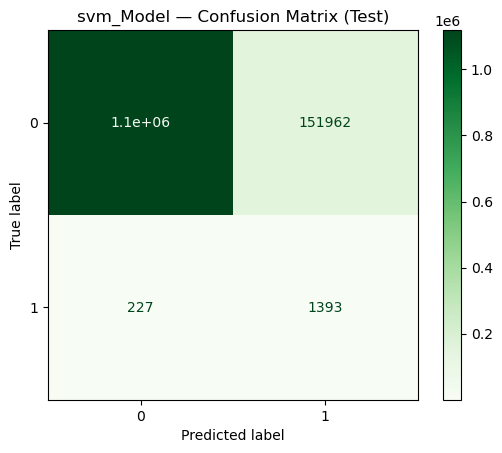

In [47]:
svm_Model_Report = model_performance('svm_Model', svm, X_train_resampled, y_train_resampled, X_test_scaled, y_test, analysis_df)

# DECISION TREE 

#### <U> Modelling</U>

######  FIRST TRY WITHDEFAULT PARAMS 

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled,y_train_resampled)               #while spliting it will calulate the gini value and considers best gini value 

DecisionTreeClassifier(random_state=42)

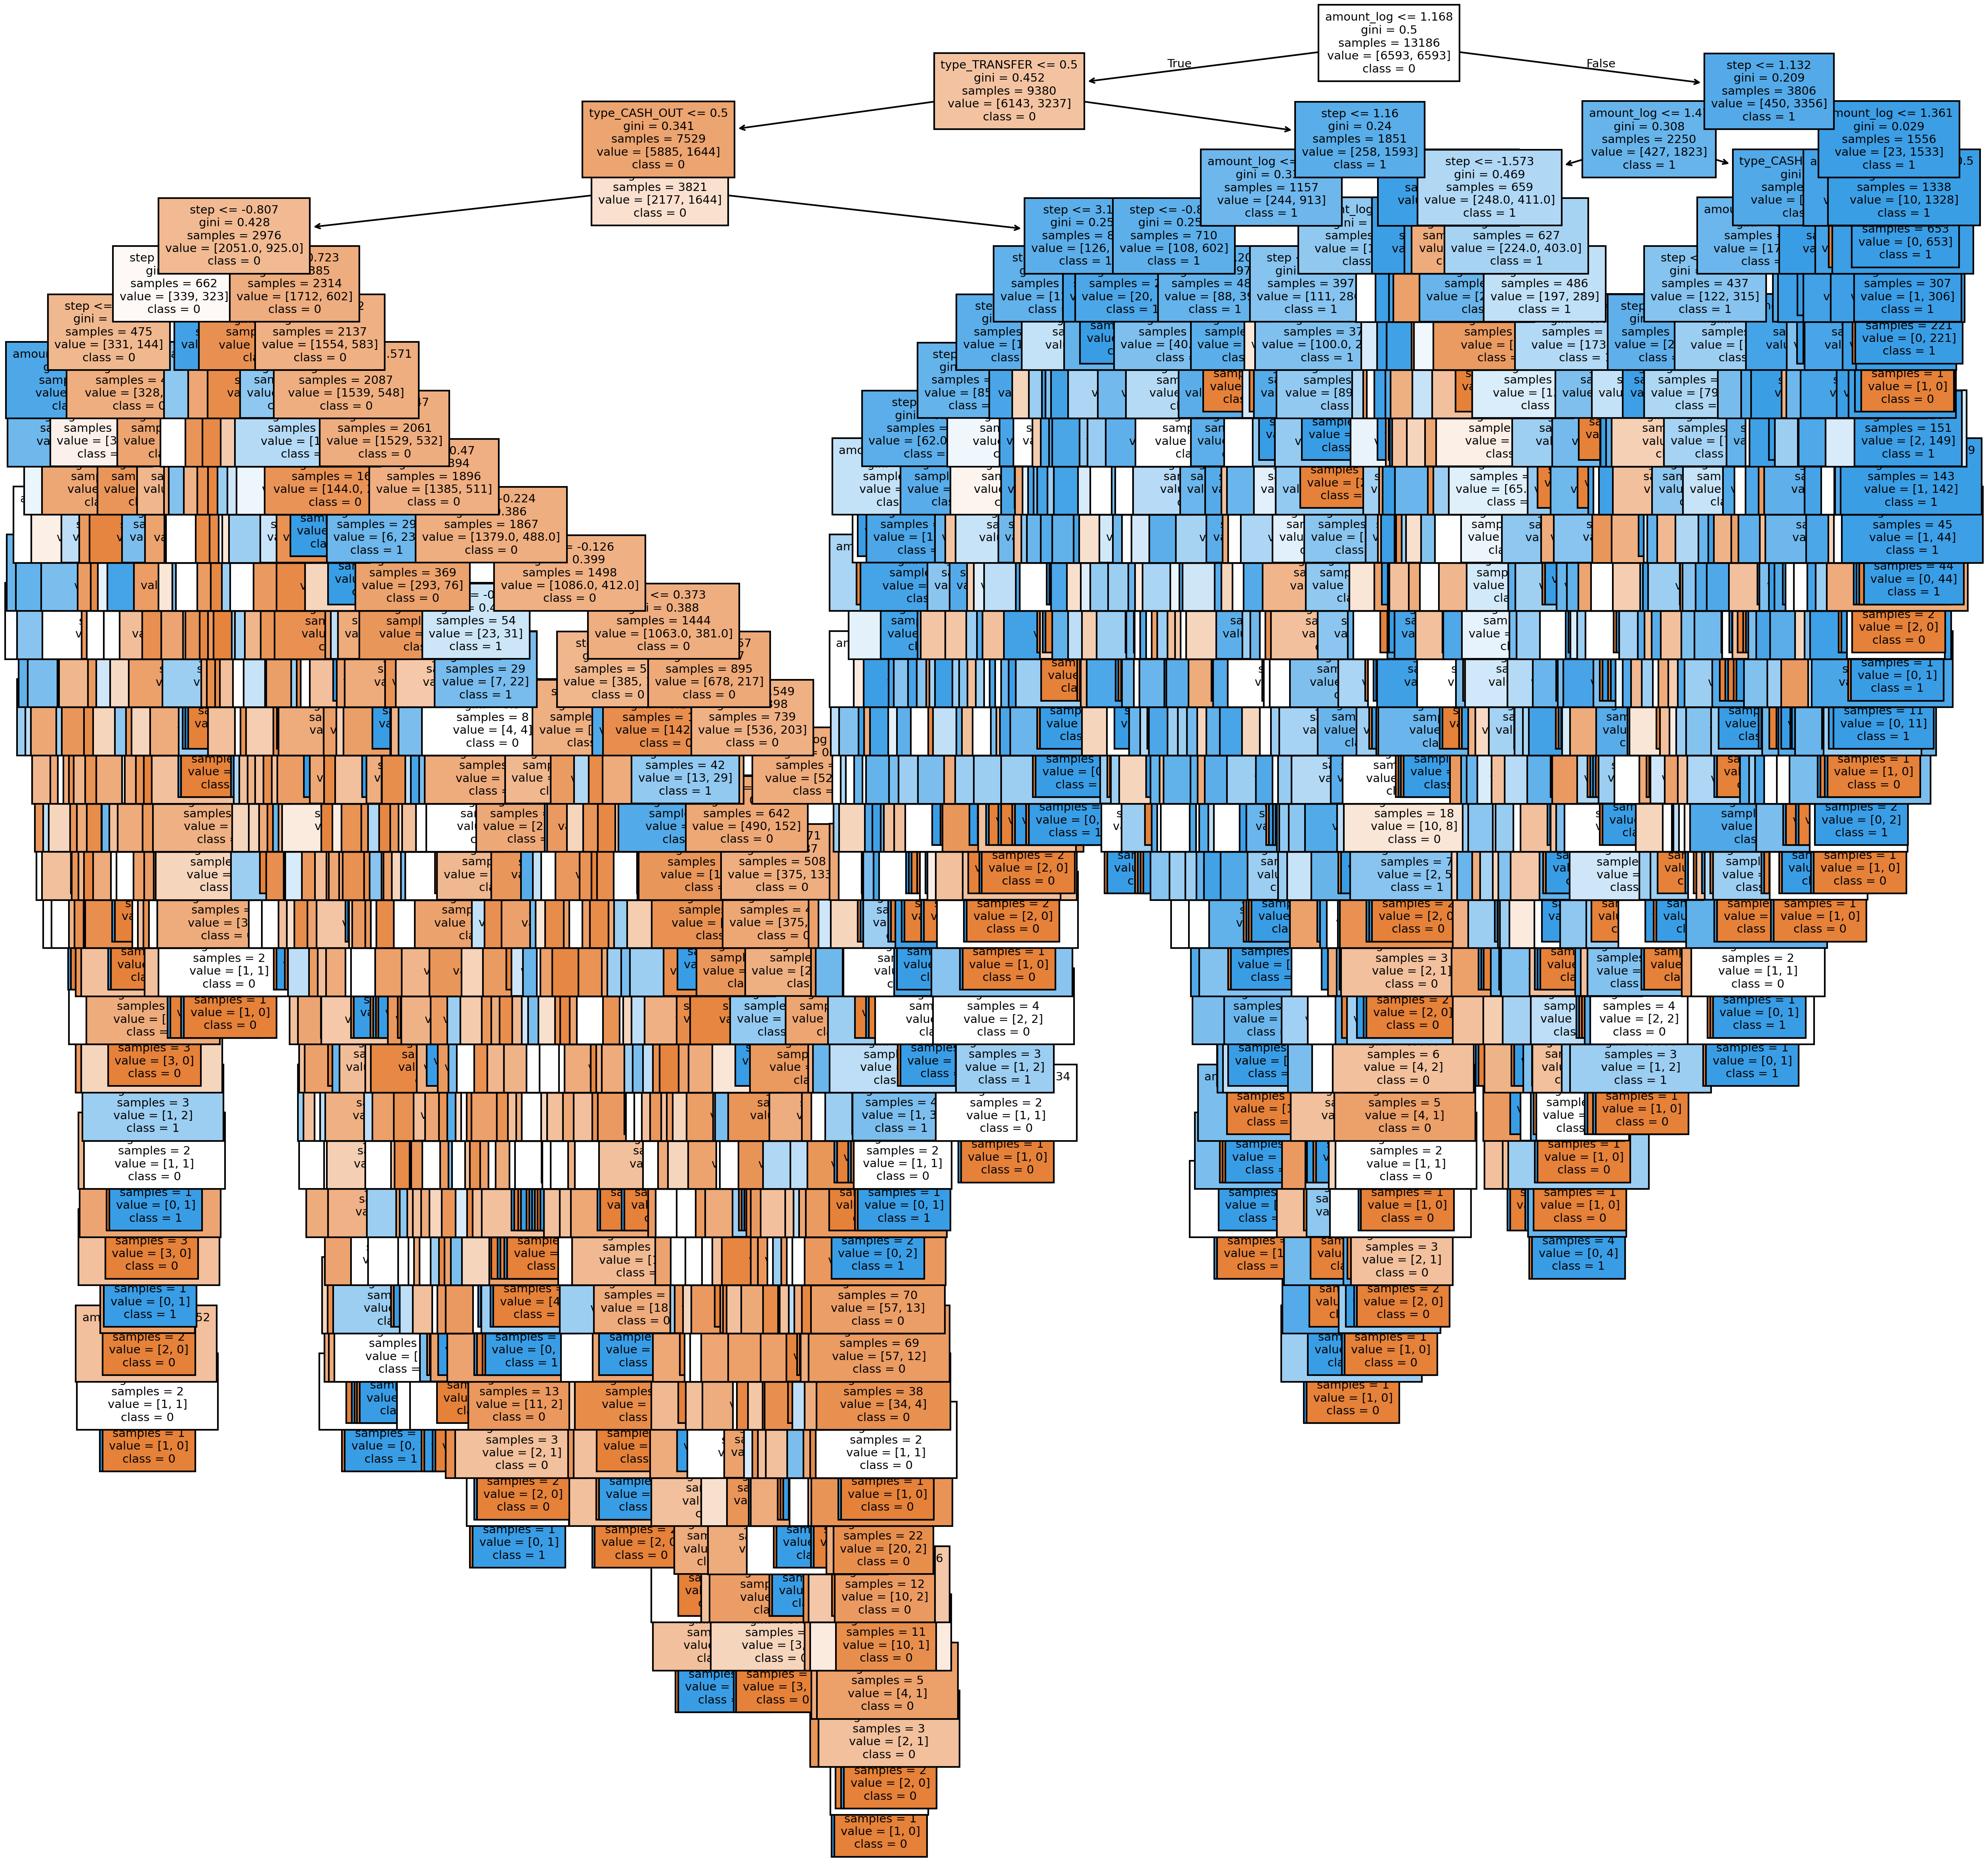

In [49]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(dt,filled=True,feature_names=['step','isFlaggedFraud','amount_log','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER'],class_names=['0', '1'],fontsize=7)
plt.show()

In [50]:
dt.fit(X_train_resampled, y_train_resampled)
ypred_train = dt.predict(X_train_resampled)
print("TRAIN ACCURACY ",accuracy_score(y_train_resampled,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(dt,X_train_resampled,y_train_resampled,cv=5,scoring="accuracy").mean())
ypred_test= dt.predict(X_test)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))

TRAIN ACCURACY  1.0
THE CV SCORE(accuracy  of model) 0.8594719169640184
TEST ACCURACY  0.0016879838808541135


##### In this data set there is  Overfitting problem,then cut the tree using pruning which was given below

In [51]:
estimator=DecisionTreeClassifier(random_state=42)
#params(which u want to tune and identify the best)
param_grid={"criterion":["gini","entropy"],"max_depth":[1,3,5,6]}
grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)     
grid.fit(X_train_resampled,y_train_resampled)
grid.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [52]:
#best model
grid.best_estimator_

DecisionTreeClassifier(max_depth=6, random_state=42)

##### After creating decision tree model ,using decision tree we can identify the important features 

In [53]:
grid.best_estimator_.feature_importances_

array([0.16887004, 0.        , 0.38317005, 0.16690067, 0.        ,
       0.        , 0.28105924])

In [54]:
s1=pd.DataFrame(index=X_train_resampled.columns,data=dt.feature_importances_,columns=["Feature Importance"])
s1

,Feature Importance
step,0.265474
isFlaggedFraud,0.000000
amount_log,0.433724
type_CASH_OUT,0.113279
type_DEBIT,0.000000
type_PAYMENT,0.000000
type_TRANSFER,0.187523


In [55]:
# Identify the important features 
imp_columns=s1[s1["Feature Importance"] > 0].index.tolist()
imp_columns

['step', 'amount_log', 'type_CASH_OUT', 'type_TRANSFER']

### FINAL DECISION TREE  MODEL 
###### with best params and important columns 

In [56]:
X_imp=X[imp_columns]
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, train_size=0.8, random_state=42)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [57]:
X_imp=X[imp_columns]
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,train_size=0.8,random_state=42)
fdt=DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=42)
fdt.fit(X_train_resampled,y_train_resampled)  
ypred_train = fdt.predict(X_train_resampled)
print("TRAIN ACCURACY ",accuracy_score(y_train_resampled,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(fdt,X_train_resampled,y_train_resampled,cv=5,scoring="accuracy").mean())
ypred_test= fdt.predict(X_test)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))          

TRAIN ACCURACY  0.883664492643713
THE CV SCORE(accuracy  of model) 0.8801004426711149
TEST ACCURACY  0.8774962201105834


📘 Classification Report — dt_Model (Train)
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6593
           1       0.88      0.88      0.88      6593

    accuracy                           0.88     13186
   macro avg       0.88      0.88      0.88     13186
weighted avg       0.88      0.88      0.88     13186

📘 Classification Report — dt_Model (Test)
              precision    recall  f1-score   support

           0       1.00      0.88      0.93   1270904
           1       0.01      0.88      0.02      1620

    accuracy                           0.88   1272524
   macro avg       0.50      0.88      0.48   1272524
weighted avg       1.00      0.88      0.93   1272524



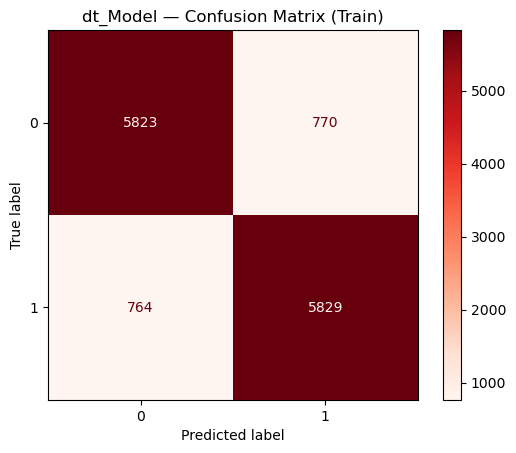

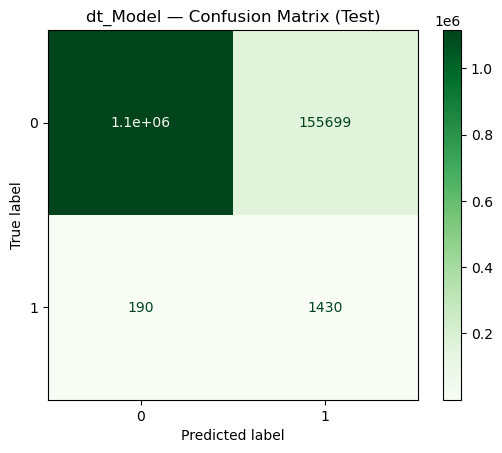

In [58]:
dt_Model_Report = model_performance('dt_Model', fdt, X_train_resampled, y_train_resampled, X_test, y_test, analysis_df)

## ***RANDOM FOREST***

#### <U> Modelling</U>

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled,y_train_resampled)   

RandomForestClassifier(random_state=42)

######  FIRST TRY WITHDEFAULT PARAMS 

In [60]:
ypred_train = rf.predict(X_train_resampled)
print("TRAIN ACCURACY ",accuracy_score(y_train_resampled,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(rf,X_train_resampled,y_train_resampled,cv=5,scoring="accuracy").mean())
ypred_test= rf.predict(X_test)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))

TRAIN ACCURACY  1.0
THE CV SCORE(accuracy  of model) 0.8840434557729955
TEST ACCURACY  0.8807268075101138


##### control overfitting in Random Forest by limiting tree growth:

In [61]:
estimator=RandomForestClassifier(random_state=42)
param_grid={'n_estimators' : list(range(1,51))}
grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)        
grid.fit(X_train_resampled,y_train_resampled)
grid.best_params_

{'n_estimators': 47}

In [62]:
#best model
grid.best_estimator_

RandomForestClassifier(n_estimators=47, random_state=42)

##### After creating random forest model we can identify the important features 

In [63]:
grid.best_estimator_.feature_importances_

array([0.31921503, 0.40217788, 0.10268112, 0.17592597])

In [64]:
s2 = pd.DataFrame(index=X_train_resampled.columns, data=rf.feature_importances_, columns=["Feature Importance"])
print(s2)

               Feature Importance
step                     0.323016
amount_log               0.407963
type_CASH_OUT            0.096360
type_TRANSFER            0.172661


In [65]:
# Identify the important features 
imp_columns=s2[s2["Feature Importance"] > 0].index.tolist()
imp_columns

['step', 'amount_log', 'type_CASH_OUT', 'type_TRANSFER']

### FINAL RANDOM FOREST MODEL 
###### with best params and important columns 

In [66]:
X_imp=X[imp_columns]
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,train_size=0.8,random_state=42)
frf=RandomForestClassifier(n_estimators=47,random_state=42)
frf.fit(X_train_resampled,y_train_resampled)  
ypred_train = frf.predict(X_train_resampled)
print("TRAIN ACCURACY ",accuracy_score(y_train_resampled,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(frf,X_train_resampled,y_train_resampled,cv=5,scoring="accuracy").mean())
ypred_test= frf.predict(X_test)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))          

TRAIN ACCURACY  0.9990899438798726
THE CV SCORE(accuracy  of model) 0.8841195870396292
TEST ACCURACY  0.8792140659036686


📘 Classification Report — rf_Model (Train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6593
           1       1.00      1.00      1.00      6593

    accuracy                           1.00     13186
   macro avg       1.00      1.00      1.00     13186
weighted avg       1.00      1.00      1.00     13186

📘 Classification Report — rf_Model (Test)
              precision    recall  f1-score   support

           0       1.00      0.88      0.94   1270904
           1       0.01      0.87      0.02      1620

    accuracy                           0.88   1272524
   macro avg       0.50      0.88      0.48   1272524
weighted avg       1.00      0.88      0.93   1272524



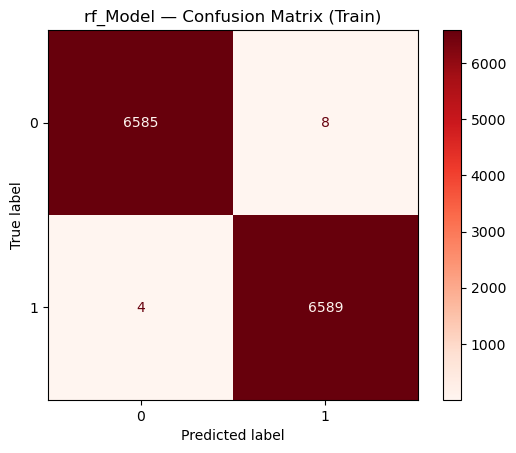

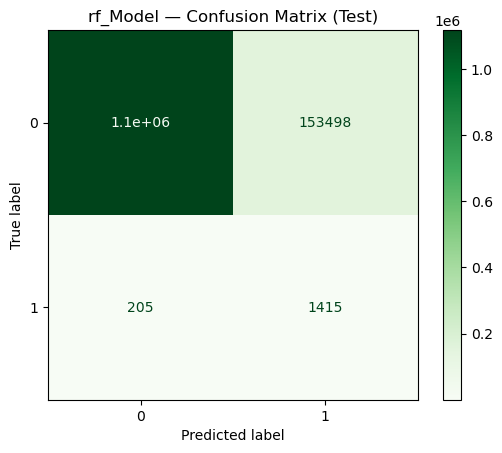

In [67]:
rf_Model_Report = model_performance('rf_Model', frf, X_train_resampled, y_train_resampled, X_test, y_test, analysis_df)

# ADA BOOST 

In [68]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier(random_state=42)
ab.fit(X_train_resampled,y_train_resampled)       

AdaBoostClassifier(random_state=42)

######  FIRST TRY WITHOUT USING ANY PARAMS 

In [69]:
ypred_train = ab.predict(X_train_resampled)
print("TRAIN ACCURACY ",accuracy_score(y_train_resampled,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(ab,X_train_resampled,y_train_resampled,cv=5,scoring="accuracy").mean())
ypred_test= ab.predict(X_test)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))

TRAIN ACCURACY  0.8835886546337024
THE CV SCORE(accuracy  of model) 0.8823752955189791
TEST ACCURACY  0.8787189868324684


#### ADA BOOST>>> apply the HPT for identifying the best params

In [70]:
estimator_ab=AdaBoostClassifier(random_state=42)
#params(which u want to tune and identify the best)     
param_grid_ab={"n_estimators":list(range(1,31))}                    
grid=GridSearchCV(estimator_ab,param_grid_ab,scoring="accuracy",cv=5)         
grid.fit(X_train_resampled,y_train_resampled)
grid.best_params_

{'n_estimators': 29}

In [71]:
grid.best_estimator_

AdaBoostClassifier(n_estimators=29, random_state=42)

In [72]:
grid.best_estimator_.feature_importances_

array([0.28002672, 0.14122441, 0.24646055, 0.33228832])

In [73]:
s3=pd.DataFrame(index=X_train_resampled.columns,data=ab.feature_importances_,columns=["Feature Importance"])
s3

,Feature Importance
step,0.309434
amount_log,0.173466
type_CASH_OUT,0.222369
type_TRANSFER,0.294731


In [74]:
# Identify the important features 
imp_columns=s3[s3["Feature Importance"] > 0].index.tolist()
imp_columns

['step', 'amount_log', 'type_CASH_OUT', 'type_TRANSFER']

### Final Adaboost model with best hyperparameter and important columns 

In [75]:
X_imp=X[imp_columns]
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,train_size=0.8,random_state=42)
fab=AdaBoostClassifier(n_estimators=27)
fab.fit(X_train_resampled,y_train_resampled)  
ypred_train = fab.predict(X_train_resampled)
print("TRAIN ACCURACY ",accuracy_score(y_train_resampled,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(fab,X_train_resampled,y_train_resampled,cv=5,scoring="accuracy").mean())
ypred_test= fab.predict(X_test)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))          

TRAIN ACCURACY  0.8392234187774913
THE CV SCORE(accuracy  of model) 0.8684959158508001
TEST ACCURACY  0.9091152701245713


📘 Classification Report — ada_Model (Train)
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6593
           1       0.90      0.77      0.83      6593

    accuracy                           0.84     13186
   macro avg       0.85      0.84      0.84     13186
weighted avg       0.85      0.84      0.84     13186

📘 Classification Report — ada_Model (Test)
              precision    recall  f1-score   support

           0       1.00      0.91      0.95   1270904
           1       0.01      0.78      0.02      1620

    accuracy                           0.91   1272524
   macro avg       0.51      0.84      0.49   1272524
weighted avg       1.00      0.91      0.95   1272524



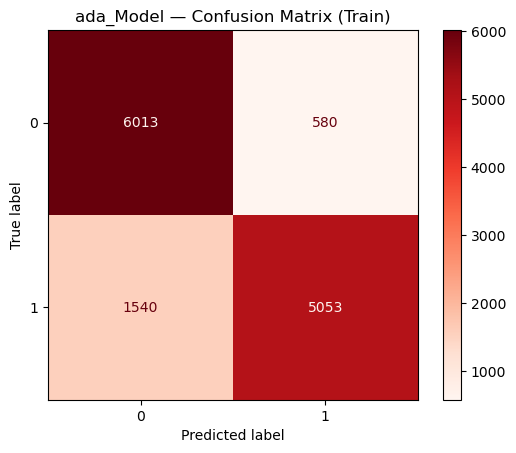

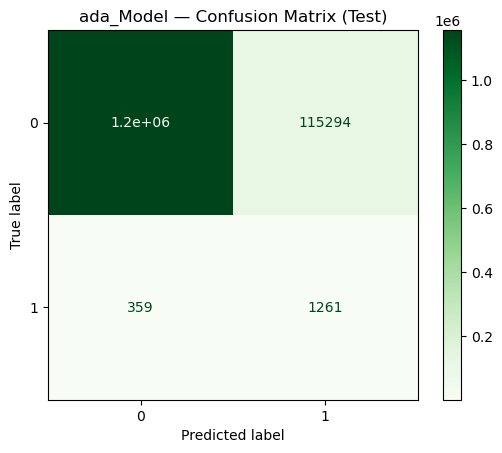

In [76]:
ada_Model_Report = model_performance('ada_Model', fab, X_train_resampled, y_train_resampled, X_test, y_test, analysis_df)

## GRADIENT BOOST 

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=42)
gb.fit(X_train_resampled,y_train_resampled)       

GradientBoostingClassifier(random_state=42)

######  FIRST TRY WITHOUT USING ANY PARAMS 

In [78]:
ypred_train = gb.predict(X_train_resampled)
print("TRAIN ACCURACY ",accuracy_score(y_train_resampled,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(gb,X_train_resampled,y_train_resampled,cv=5,scoring="accuracy").mean())
ypred_test= gb.predict(X_test)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))

TRAIN ACCURACY  0.8926892158349765
THE CV SCORE(accuracy  of model) 0.8895039478719327
TEST ACCURACY  0.8892083764235488


#### GRADIENT BOOST>>> apply the HPT for identifying the best params

In [79]:
estimator_gb=GradientBoostingClassifier(random_state=42)
#params(which u want to tune and identify the best)     
param_grid_gb={"n_estimators":list(range(1,20))
              ,"learning_rate":[0,0.5,1.0]}                  
grid=GridSearchCV(estimator_gb,param_grid_gb,scoring="accuracy",cv=5)         
grid.fit(X_train_resampled,y_train_resampled)
grid.best_params_

{'learning_rate': 1.0, 'n_estimators': 19}

In [80]:
grid.best_estimator_

GradientBoostingClassifier(learning_rate=1.0, n_estimators=19, random_state=42)

In [81]:
grid.best_estimator_.feature_importances_

array([0.15531493, 0.39768357, 0.17474719, 0.27225431])

In [82]:
s4=pd.DataFrame(index=X_train_resampled.columns,data=gb.feature_importances_,columns=["Feature Importance"])
s4

,Feature Importance
step,0.239320
amount_log,0.345695
type_CASH_OUT,0.126825
type_TRANSFER,0.288161


In [83]:
imp_columns=s4[s4["Feature Importance"] > 0].index.tolist()
imp_columns

['step', 'amount_log', 'type_CASH_OUT', 'type_TRANSFER']

### Final Gradientboost model with best hyperparameter and important columns 

In [84]:
X_imp=X[imp_columns]
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,train_size=0.8,random_state=42)
fgb=GradientBoostingClassifier(n_estimators=19,learning_rate=1.0)
fgb.fit(X_train_resampled,y_train_resampled)  
ypred_train = fgb.predict(X_train_resampled)
print("TRAIN ACCURACY ",accuracy_score(y_train_resampled,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(fgb,X_train_resampled,y_train_resampled,cv=5,scoring="accuracy").mean())
ypred_test= fgb.predict(X_test)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))          

TRAIN ACCURACY  0.9054300015167602
THE CV SCORE(accuracy  of model) 0.8964808264497501
TEST ACCURACY  0.8944499278599067


📘 Classification Report — gb_Model (Train)
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      6593
           1       0.91      0.91      0.91      6593

    accuracy                           0.91     13186
   macro avg       0.91      0.91      0.91     13186
weighted avg       0.91      0.91      0.91     13186

📘 Classification Report — gb_Model (Test)
              precision    recall  f1-score   support

           0       1.00      0.89      0.94   1270904
           1       0.01      0.89      0.02      1620

    accuracy                           0.89   1272524
   macro avg       0.51      0.89      0.48   1272524
weighted avg       1.00      0.89      0.94   1272524



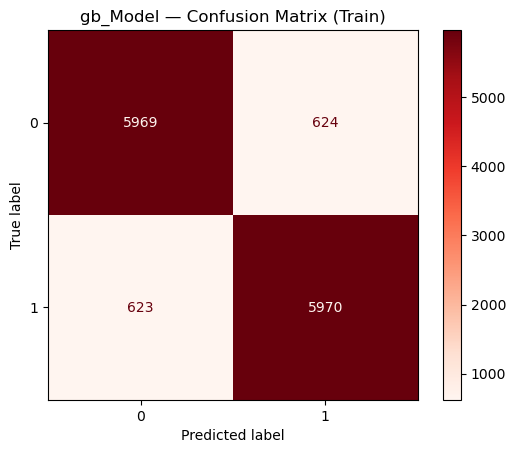

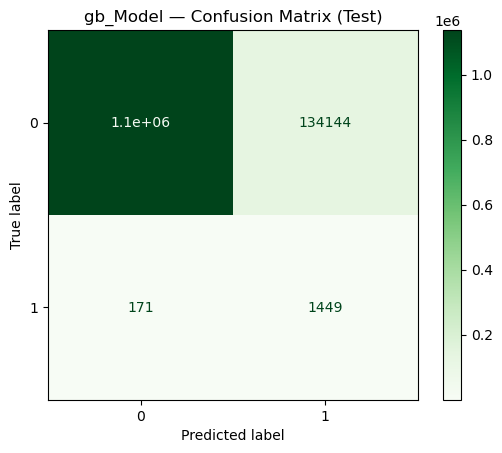

In [85]:
gb_Model_Report = model_performance('gb_Model', fgb, X_train_resampled, y_train_resampled, X_test, y_test, analysis_df)

# EXTREME GRADIENTBOOSTING(XGBOOST)

In [86]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)  
xgb.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

######  FIRST TRY WITHOUT USING ANY PARAMS 

In [87]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
ypred_train = xgb.predict(X_train_resampled)
print("TRAIN ACCURACY ", accuracy_score(y_train_resampled, ypred_train))
print("THE CV SCORE(accuracy  of model)", cross_val_score(xgb, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy").mean())
ypred_test = xgb.predict(X_test)
print("TEST ACCURACY ", accuracy_score(y_test, ypred_test))

TRAIN ACCURACY  0.9390262399514637
THE CV SCORE(accuracy  of model) 0.8995146631752087
TEST ACCURACY  0.9048630909908183


####  EXTREME GRADIENT BOOST>>> apply the HPT for identifying the best params

In [88]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
estimator_xgb = XGBClassifier()  
param_grid_xgb = {
    "n_estimators": list(range(1, 11)),
    "learning_rate": [0, 0.5, 1.0],
    "max_depth": [3,5],
    "gamma": [0, 0.5]
}
grid = GridSearchCV(estimator_xgb, param_grid_xgb, scoring="accuracy", cv=5)
grid.fit(X_train_resampled, y_train_resampled)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'gamma': 0.5, 'learning_rate': 1.0, 'max_depth': 5, 'n_estimators': 9}


In [89]:
grid.best_estimator_.feature_importances_

array([0.04818114, 0.11432187, 0.22062758, 0.61686945], dtype=float32)

In [90]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1.0, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=9,
              n_jobs=None, num_parallel_tree=None, ...)

In [91]:
s4=pd.DataFrame(index=X_train_resampled.columns,data=xgb.feature_importances_,columns=["Feature Importance"])
s4

,Feature Importance
step,0.023851
amount_log,0.033779
type_CASH_OUT,0.257380
type_TRANSFER,0.684989


In [92]:
imp_columns=s4[s4["Feature Importance"] > 0].index.tolist()
imp_columns

['step', 'amount_log', 'type_CASH_OUT', 'type_TRANSFER']

### Final ExtremeGradientboost model with best hyperparameter and important columns 

In [93]:
X_imp=X[imp_columns]
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,train_size=0.8,random_state=16)
fxgb=XGBClassifier(n_estimators=9,learning_rate=1.0,max_depth=5,gamma=0.5)
fxgb.fit(X_train_resampled,y_train_resampled)  
ypred_train = fxgb.predict(X_train_resampled)
print("TRAIN ACCURACY ",accuracy_score(y_train_resampled,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(fxgb,X_train_resampled,y_train_resampled,cv=5,scoring="accuracy").mean())
ypred_test= fxgb.predict(X_test)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))          

TRAIN ACCURACY  0.9050508114667071
THE CV SCORE(accuracy  of model) 0.8944335911388726
TEST ACCURACY  0.8920491872844835


📘 Classification Report — xg_Model (Train)
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      6593
           1       0.90      0.91      0.91      6593

    accuracy                           0.91     13186
   macro avg       0.91      0.91      0.91     13186
weighted avg       0.91      0.91      0.91     13186

📘 Classification Report — xg_Model (Test)
              precision    recall  f1-score   support

           0       1.00      0.89      0.94   1270862
           1       0.01      0.91      0.02      1662

    accuracy                           0.89   1272524
   macro avg       0.51      0.90      0.48   1272524
weighted avg       1.00      0.89      0.94   1272524



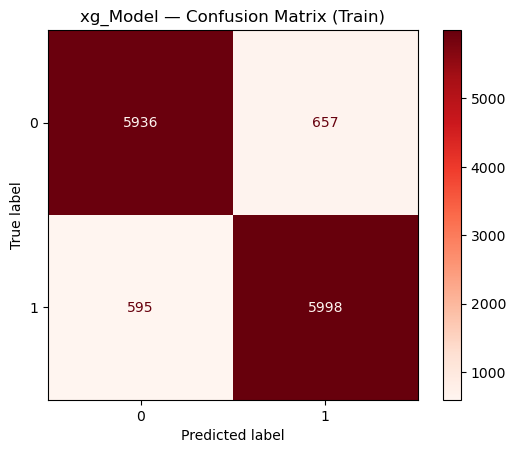

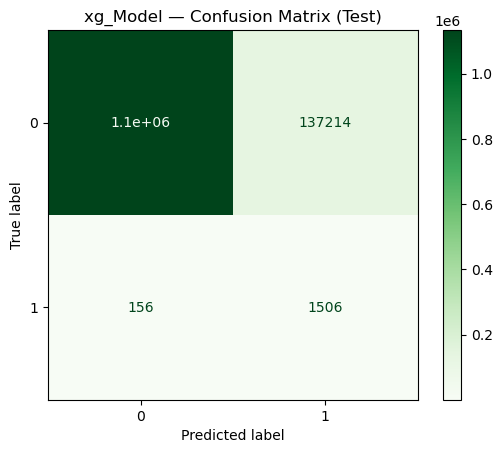

In [94]:
xg_Model_Report = model_performance('xg_Model', fxgb, X_train_resampled, y_train_resampled, X_test, y_test, analysis_df)

In [95]:
analysis_df

,TrainAccuracy,TestAccuracy,TrainPrecision,TestPrecision,TrainRecall,TestRecall,TrainF1,TestF1,CV
logistic_Model,0.813894,0.73979,0.77378,0.004291,0.887153,0.880247,0.826597,0.00854,0.813363
knn_Model,0.879114,0.877509,0.881428,0.009039,0.876081,0.876543,0.878746,0.017894,0.875929
svm_Model,0.869255,0.880404,0.878204,0.009083,0.857425,0.859877,0.86769,0.017977,0.867814
dt_Model,0.883664,0.877496,0.883316,0.009101,0.88412,0.882716,0.883717,0.018016,0.8801
rf_Model,0.99909,0.879214,0.998787,0.009134,0.999393,0.873457,0.99909,0.018079,0.88412
ada_Model,0.839223,0.909115,0.897035,0.010819,0.766419,0.778395,0.826599,0.021341,0.868496
gb_Model,0.90543,0.89445,0.905369,0.010686,0.905506,0.894444,0.905437,0.02112,0.896481
xg_Model,0.905051,0.892049,0.901277,0.010856,0.909753,0.906137,0.905495,0.021456,0.894434


### ***Here The best model is Xg Boost***

In [96]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

### Save The Model

In [97]:
import joblib
# After training your model
joblib.dump(xgb_model, 'xgboost_fraud.pkl')

['xgboost_fraud.pkl']

In [98]:
import joblib
# After training your model
joblib.dump(scaler, 'scaler_fraud.pkl')

['scaler_fraud.pkl']

# Steps to be followed after saving the model 

##### step1:Load the Model and Scaler

In [99]:
import joblib
xgb_model = joblib.load('xgboost_fraud.pkl')   # your saved model
scaler = joblib.load('scaler_fraud.pkl')            # your saved scaler

##### Step 2: Accept New Data ( through user input)

In [ ]:
Based on feature importance from the XGBoost model, the following 4 features were selected for final training and prediction:
- step
- amount_log
- type_CASH_OUT
- type_TRANSFER
These features showed the highest contribution to the model’s performance and were used in the final pipeline.

In [121]:
# Collect inputs from user
step = int(input("Enter the time step of the transaction (e.g., 1 to 744): "))
amount_log = float(input("Enter the log of the transaction amount (e.g., 5.2 to 15.6): "))
print("Enter transaction type (only one should be 1, others 0):")
type_CASH_OUT = int(input("Is it a CASH_OUT transaction? (0 = No, 1 = Yes): "))
type_TRANSFER = int(input("Is it a TRANSFER transaction? (0 = No, 1 = Yes): "))
# Create input array for prediction (order must match training features)
input_data = [[step, amount_log, type_CASH_OUT, type_TRANSFER]]

Enter the time step of the transaction (e.g., 1 to 744):  300
Enter the log of the transaction amount (e.g., 5.2 to 15.6):  6


Enter transaction type (only one should be 1, others 0):


Is it a CASH_OUT transaction? (0 = No, 1 = Yes):  0
Is it a TRANSFER transaction? (0 = No, 1 = Yes):  0


##### Step 3: Scale the New Data (only the scaled columns)

In [122]:
scaled_columns = scaler.transform(df[columns_to_scale])
#-------------A 2D Array containing scaled values of the variables

In [123]:
step_scaled = scaled_columns[0][0] 
amount_log_scaled = scaled_columns[0][1]

In [124]:
input_from_customer = [
    step_scaled,
    amount_log_scaled, 
    type_CASH_OUT, 
    type_TRANSFER
]

In [125]:
input_array = np.array([input_from_customer])

##### Step 4: Make Predictions

In [126]:
pred = xgb_model.predict(input_array)
if pred[0] == 1:
    print("Fraudulent transaction detected!")
else:
    print("Transaction is normal.")

Transaction is normal.


####  Example Results
- A transaction at **step = 2**, with **CASH_OUT = 1**, was predicted as **fraud**.  
  → This matches typical fraud patterns in the data: early transaction time combined with a risky transaction type.
- A transaction at **step = 300**, amount ≈ ₹400, and no risky type was predicted as **normal**.  
  → This reflects normal customer behavior during regular hours with a safe transaction type.
- These examples show that the model has successfully learned to detect fraud patterns based on **transaction time**, 
 **amount**, and **type of transaction**.
- The final XGBoost model is now ready for **real-time fraud prediction** using user input or deployment in applications.

### Final Conclusion

In this project, I built a fraud detection model using machine learning techniques.  
After trying different models, I found that **XGBoost** gave the best performance overall.

Here are the top 3 results for the XGBoost model:
- Test Accuracy: **89.2%**
-  Cross-Validation Score: **89.4%**
-  Test Recall: **90.6%** (which means it catches most of the fraud cases)

I used only the most important features in the final model:
- `step` (when the transaction happened)
- `amount_log` (the log of the transaction amount)
- `type_CASH_OUT` and `type_TRANSFER` (type of transaction)

I tested a few examples:
- A transaction with `step = 2` and `CASH_OUT = 1` was predicted as **fraud**
- Another one at `step = 300` with safe values was predicted as **normal**

This shows the model is working well and can now be used for real-time fraud detection or future deployment.